In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
(x,y),(x_test,y_test) = keras.datasets.mnist.load_data()
x.shape, y.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [3]:
y_onehot = tf.one_hot(y, depth=10)
y_onehot[:2]

2022-05-10 14:32:24.228868: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


<tf.Tensor: shape=(2, 10), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)>

In [4]:
(x,y),(x_test,y_test) = keras.datasets.cifar10.load_data()
db = tf.data.Dataset.from_tensor_slices(x_test)
next(iter(db)).shape

170508288/170498071 [==============================] - 56s 0us/step


TensorShape([32, 32, 3])

In [5]:
db = tf.data.Dataset.from_tensor_slices((x_test,y_test))
next(iter(db))[0].shape

TensorShape([32, 32, 3])

In [7]:
db = db.shuffle(10000)
next(iter(db))[1].shape

TensorShape([1])

In [8]:
db2 = db.batch(32)
res = next(iter(db2))
res[0].shape, res[1].shape

(TensorShape([32, 32, 32, 3]), TensorShape([32, 1]))

In [10]:
def preprocess(x, y):
    y = tf.one_hot(y, depth=10)
    return (x,y)
db3 = db.map(preprocess)
db3 = db3.batch(32)
res = next(iter(db3))
res[0].shape, res[1].shape

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


(TensorShape([32, 32, 32, 3]), TensorShape([32, 1, 10]))

In [11]:
db4 = db3.repeat(2)

In [12]:
x = tf.random.normal([4,784])
net = tf.keras.layers.Dense(512)
out = net(x)
out.shape

TensorShape([4, 512])

In [13]:
net.kernel.shape, net.bias.shape

(TensorShape([784, 512]), TensorShape([512]))

In [14]:
net.build(input_shape=[None, 784])

In [16]:
x = tf.random.normal([2,3])
model = keras.Sequential([
    keras.layers.Dense(2, activation='relu'),
    keras.layers.Dense(2, activation='relu'),
    keras.layers.Dense(2),
])
model.build(input_shape=[None, 3])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 2)                 8         
                                                                 
 dense_2 (Dense)             (None, 2)                 6         
                                                                 
 dense_3 (Dense)             (None, 2)                 6         
                                                                 
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


In [17]:
for p in model.trainable_variables:
    print(p.name, p.shape)

dense_1/kernel:0 (3, 2)
dense_1/bias:0 (2,)
dense_2/kernel:0 (2, 2)
dense_2/bias:0 (2,)
dense_3/kernel:0 (2, 2)
dense_3/bias:0 (2,)


In [19]:
a = tf.fill([4], 0.25)
a*tf.math.log(a)/tf.math.log(2.)


<tf.Tensor: shape=(4,), dtype=float32, numpy=array([-0.5, -0.5, -0.5, -0.5], dtype=float32)>

In [20]:
-tf.reduce_sum(a*tf.math.log(a)/tf.math.log(2.))

<tf.Tensor: shape=(), dtype=float32, numpy=2.0>

In [21]:
tf.losses.categorical_crossentropy([0,1,0,0],[0.25,0.25,0.25,0.25])

<tf.Tensor: shape=(), dtype=float32, numpy=1.3862944>

In [22]:
tf.losses.categorical_crossentropy([0,1,0,0],[0.1,0.1,0.7,0.1])

<tf.Tensor: shape=(), dtype=float32, numpy=2.3025851>

In [23]:
tf.losses.BinaryCrossentropy()([1],[0.1])

<tf.Tensor: shape=(), dtype=float32, numpy=2.3025842>

In [24]:
tf.losses.binary_crossentropy([1],[0.1])

<tf.Tensor: shape=(), dtype=float32, numpy=2.3025842>

In [25]:
# 梯度


In [26]:
w = tf.Variable(1.0)
b = tf.Variable(2.0)
x = tf.Variable(3.0)
with tf.GradientTape() as t1:
    with tf.GradientTape() as t2:
        y = w * x + b
    [g_w,g_b] = t2.gradient(y, [w, b])
g2_w = t1.gradient(g_w, [w])
g_w, g_b, g2_w

(<tf.Tensor: shape=(), dtype=float32, numpy=3.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1.0>,
 [None])

x,y range: (120,) (120,)
X,Y maps: (120, 120) (120, 120)


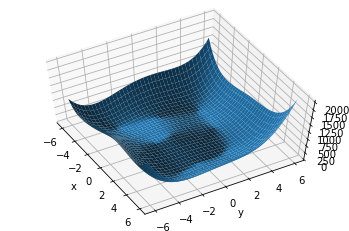

step 0: x = [ 3.26       -0.09999999], f(x) = 34.0
step 20: x = [ 3.54679   -1.4388103], f(x) = 2.747403860092163
step 40: x = [ 3.5843565 -1.8473401], f(x) = 1.7569735064171255e-05
step 60: x = [ 3.5844283 -1.8481257], f(x) = 2.3646862246096134e-11
step 80: x = [ 3.5844283 -1.8481264], f(x) = 2.2737367544323206e-13
step 100: x = [ 3.5844283 -1.8481264], f(x) = 2.2737367544323206e-13
step 120: x = [ 3.5844283 -1.8481264], f(x) = 2.2737367544323206e-13
step 140: x = [ 3.5844283 -1.8481264], f(x) = 2.2737367544323206e-13
step 160: x = [ 3.5844283 -1.8481264], f(x) = 2.2737367544323206e-13
step 180: x = [ 3.5844283 -1.8481264], f(x) = 2.2737367544323206e-13


In [27]:
import  numpy as np
from    mpl_toolkits.mplot3d import Axes3D
from    matplotlib import pyplot as plt
import  tensorflow as tf



def himmelblau(x):
    return (x[0] ** 2 + x[1] - 11) ** 2 + (x[0] + x[1] ** 2 - 7) ** 2


x = np.arange(-6, 6, 0.1)
y = np.arange(-6, 6, 0.1)
print('x,y range:', x.shape, y.shape)
X, Y = np.meshgrid(x, y)
print('X,Y maps:', X.shape, Y.shape)
Z = himmelblau([X, Y])

fig = plt.figure('himmelblau')
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z)
ax.view_init(60, -30)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()


# [1., 0.], [-4, 0.], [4, 0.]
x = tf.constant([4., 0.])

for step in range(200):

    with tf.GradientTape() as tape:
        tape.watch([x])
        y = himmelblau(x)

    grads = tape.gradient(y, [x])[0] 
    x -= 0.01*grads

    

    if step % 20 == 0:
        print ('step {}: x = {}, f(x) = {}'
               .format(step, x.numpy(), y.numpy()))